In [114]:
import pandas as pd
import os
import json
import pywer
# !pip install pyjarowinkler
from pyjarowinkler import distance as jwdistance

class Const:
    OCR = 'ocr'
    GROUND = 'groundtruth'
    REGION = 'region'
    LINE = 'line'
    SENTENCE = 'sentence'
    FILE = 'filename'
    DATASET = 'dataset_name'
    PREDICTION = 'prediction'
    PROMPT = 'prompt'
    LANGUAGE = 'language'
    NONE = None


In [96]:
datasets = []

for root, dirs, files in os.walk('../data/datasets/ocr/converted'):
    for file in files:
        if file.endswith(".jsonl"):
            input_file = os.path.join(root, file)
            print(input_file)
            with open(input_file) as f:
                lines = f.read().splitlines()
            df_inter = pd.DataFrame(lines)
            df_inter.columns = ['json_element']
            df_inter['json_element'].apply(json.loads)
            df = pd.json_normalize(df_inter['json_element'].apply(json.loads))
            datasets.append(df)

../data/datasets/ocr/converted/overproof/overproof.jsonl
../data/datasets/ocr/converted/ajmc/ajmc_mixed.jsonl
../data/datasets/ocr/converted/ajmc/ajmc_primary_text.jsonl
../data/datasets/ocr/converted/impresso/impresso-nzz.jsonl
../data/datasets/ocr/converted/sample/sample.jsonl
../data/datasets/ocr/converted/icdar/icdar-2017.jsonl
../data/datasets/ocr/converted/icdar/icdar-2019.jsonl


In [3]:
print('Number of unique lines/sentences/regions.\n')
for dataset in datasets:
    print('Dataset:', dataset['dataset_name'].unique()[0])
    print('No. lines:', dataset['ocr.line']. nunique(), '/', len(dataset['ocr.sentence']), 
          'No. sentences:', dataset['ocr.sentence']. nunique(), '/', len(dataset['ocr.sentence']), 
          'No. regions:', dataset['ocr.region']. nunique(), '/', len(dataset['ocr.region']))
    print('-'*80)

Number of unique lines/sentences/regions.

Dataset: overproof
No. lines: 2278 / 2669 No. sentences: 399 / 2669 No. regions: 41 / 2669
--------------------------------------------------------------------------------
Dataset: ajmc
No. lines: 870 / 2131 No. sentences: 679 / 2131 No. regions: 63 / 2131
--------------------------------------------------------------------------------
Dataset: ajmc
No. lines: 151 / 330 No. sentences: 112 / 330 No. regions: 33 / 330
--------------------------------------------------------------------------------
Dataset: impresso-nzz
No. lines: 3709 / 6140 No. sentences: 1943 / 6140 No. regions: 635 / 6140
--------------------------------------------------------------------------------
Dataset: impresso-nzz
No. lines: 1016 / 1215 No. sentences: 837 / 1215 No. regions: 427 / 1215
--------------------------------------------------------------------------------
Dataset: icdar-2017
No. lines: 0 / 477 No. sentences: 461 / 477 No. regions: 28 / 477
-----------------

In [4]:
datasets[0].head()

filename dataset_name  \
0  ../../data/datasets/ocr/original/overproof/dat...    overproof   
1  ../../data/datasets/ocr/original/overproof/dat...    overproof   
2  ../../data/datasets/ocr/original/overproof/dat...    overproof   
3  ../../data/datasets/ocr/original/overproof/dat...    overproof   
4  ../../data/datasets/ocr/original/overproof/dat...    overproof   

                                          article_id  \
0  7 year 1922 type Article title http://chronicl...   
1  7 year 1922 type Article title http://chronicl...   
2  7 year 1922 type Article title http://chronicl...   
3  7 year 1922 type Article title http://chronicl...   
4  7 year 1922 type Article title http://chronicl...   

                    ocr.line  \
0                 RAIDERS IN   
1                  FREDERICK   
2                  LAND HAUL   
3                 OF $84,000   
4  Watchman Bound and Gagged   

                                        ocr.sentence  \
0  RAIDERS IN FREDERICK LAND HAUL OF $84,000 Watc...   
1  RAIDERS IN FREDERICK LAND HAUL OF $84,000 Watc...   
2  RAIDERS IN FREDERICK LAND HAUL OF $84,000 Watc...   
3  RAIDERS IN FREDERICK LAND HAUL OF $84,000 Watc...   
4  RAIDERS IN FREDERICK LAND HAUL OF $84,000 Watc...   

                                          ocr.region  \
0  RAIDERS IN FREDERICK LAND HAUL OF $84,000 Watc...   
1  RAIDERS IN FREDERICK LAND HAUL OF $84,000 Watc...   
2  RAIDERS IN FREDERICK LAND HAUL OF $84,000 Watc...   
3  RAIDERS IN FREDERICK LAND HAUL OF $84,000 Watc...   
4  RAIDERS IN FREDERICK LAND HAUL OF $84,000 Watc...   

            groundtruth.line  \
0                 RAIDERS IN   
1                FREDER IC K   
2                  LAND HAUL   
3                 OF $84,000   
4  Watchman Bound and Gagged   

                                groundtruth.sentence  \
0  RAIDERS IN FREDER IC K LAND HAUL OF $84,000 Wa...   
1  RAIDERS IN FREDER IC K LAND HAUL OF $84,000 Wa...   
2  RAIDERS IN FREDER IC K LAND HAUL OF $84,000 Wa...   
3  RAIDERS IN FREDER IC K LAND HAUL OF $84,000 Wa...   
4  RAIDERS IN FREDER IC K LAND HAUL OF $84,000 Wa...   

                                  groundtruth.region  
0  RAIDERS IN FREDER IC K LAND HAUL OF $84,000 Wa...  
1  RAIDERS IN FREDER IC K LAND HAUL OF $84,000 Wa...  
2  RAIDERS IN FREDER IC K LAND HAUL OF $84,000 Wa...  
3  RAIDERS IN FREDER IC K LAND HAUL OF $84,000 Wa...  
4  RAIDERS IN FREDER IC K LAND HAUL OF $84,000 Wa...

In [333]:
GENERATE_SAMPLE = False

In [334]:
dataset = pd.concat(datasets)

In [335]:
len(dataset)

13366

In [336]:
dataset.columns

Index(['filename', 'dataset_name', 'ocr.line', 'ocr.sentence', 'ocr.region',
       'groundtruth.line', 'groundtruth.sentence', 'groundtruth.region',
       'language', 'File', 'Date', 'Type', 'NbAlignedChar', 'article_id'],
      dtype='object')

In [337]:
if GENERATE_SAMPLE:
    from sklearn.model_selection import train_test_split

    files_keep, files_removed, _, _ = train_test_split(dataset, dataset['dataset_name'], 
                                                       test_size=0.90, random_state=42)

In [338]:
len(files_keep)

1215

In [82]:
if GENERATE_SAMPLE:
    output_file = '../data/datasets/ocr/converted/sample/sample.jsonl'
    with open(output_file, "w") as outfile:
        for index, row in files_keep.iterrows():

            json_line = json.dumps({Const.LANGUAGE: row['language'],
                                    Const.FILE: row['filename'],
                                    Const.DATASET: row['dataset_name'],
                                    Const.OCR: {Const.LINE: row['ocr.line'],
                                                Const.SENTENCE: row['ocr.sentence'],
                                                Const.REGION: row['ocr.region']}, 
                                    Const.GROUND: {Const.LINE: row['groundtruth.line'],
                                                   Const.SENTENCE: row['groundtruth.sentence'],
                                                   Const.REGION: row['groundtruth.region']},
                                    'File': row['File'], 
                                    'Date': row['Date'],
                                    'Type': row['Type'], 
                                    'NbAlignedChar': row['NbAlignedChar'], 
                                    'article_id': row['article_id']
                                    })

            outfile.write(json_line + "\n")
            outfile.flush()

NameError: name 'GENERATE_SAMPLE' is not defined

### Analsys of preliminary results

In [200]:
results = []

for root, dirs, files in os.walk('../data/output'):
    for file in files:
        if file.endswith(".jsonl"):
            input_file = os.path.join(root, file)
            print(root.split('/')[-1])
            if 'sample' not in input_file:
                print(input_file)

                with open(input_file) as f:
                    lines = f.read().splitlines()
                try:
                    df_inter = pd.DataFrame(lines)
                    df_inter.columns = ['json_element']


                    df_inter['json_element'].apply(json.loads)
                    df = pd.json_normalize(df_inter['json_element'].apply(json.loads))
                    df['model'] = [file[8:-6]] * len(df)
                    df['dataset_name'] = [root.split('/')[-1].replace('_', '-')] * len(df)
                    results.append(df)
                except:
                    print('We could not load {}'.format(file))

impresso-nzz
../data/output/prompt_basic_01/impresso-nzz/results-impresso-nzz-gpt-4.jsonl
overproof
../data/output/prompt_basic_01/overproof/results-overproof-gpt-4.jsonl
ajmc_mixed
../data/output/prompt_basic_01/ajmc_mixed/results-ajmc_mixed-gpt-4.jsonl
icdar-2019
../data/output/prompt_basic_01/icdar-2019/results-icdar-2019-gpt-4.jsonl
icdar-2017
../data/output/prompt_basic_01/icdar-2017/results-icdar-2017-gpt-4.jsonl
ajmc_primary_text
../data/output/prompt_basic_01/ajmc_primary_text/results-ajmc_primary_text-gpt-4.jsonl


In [201]:
len(results)

6

In [202]:
results[2].head()

filename dataset_name  \
0  bsb10234118   ajmc-mixed   
1  bsb10234118   ajmc-mixed   
2  bsb10234118   ajmc-mixed   
3  bsb10234118   ajmc-mixed   
4  bsb10234118   ajmc-mixed   

                                            ocr.line  \
0  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...   
1  I. T. XVI. p. 731. et 718. eamque κακόζηλον ἑρ...   
2  V. 9. Ἔνδον γὰρ ἀνήρ - Olim adnotavi articulum...   
3  δατος Aristoph. Lys. 370. αἱρώμεθ’ ὑμεῖς θοὔδ...   
4  xerit Sophocles χθονὸς ἀείρας et Oppian. Cyn. ...   

                              ocr.sentence  \
0  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm.   
1                                  p. 731.   
2                                    V. 9.   
3                                     Lys.   
4                                     Cyn.   

                                          ocr.region  \
0  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...   
1  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...   
2  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...   
3  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...   
4  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...   

                                    groundtruth.line  \
0  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...   
1  1. T. XVI. p. 731. et 718. eamque κακόζηλον ἑρ...   
2  V. 9. "Evdov γὰρ ‘arıjg — Olim adnotavi articu...   
3  durog Aristoph. Lys. 370. αἱρώμεθ’ ὑμεῖς θοὔδα...   
4  xerit Sophocles χθονὸς deigag et Oppian. Cyn. ...   

                      groundtruth.sentence  \
0  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm.   
1                                  p. 731.   
2                                    V. 9.   
3                                     Lys.   
4                                     Cyn.   

                                  groundtruth.region  \
0  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...   
1  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...   
2  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...   
3  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...   
4  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...   

                                   prediction.prompt  \
0  Correct the text: "ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετ...   
1                        Correct the text: "p. 731."   
2                          Correct the text: "V. 9."   
3                           Correct the text: "Lys."   
4                           Correct the text: "Cyn."   

                                     prediction.line  \
0  Απ' ἐκείνων ἐπὶ τὰ πάθη μετάβασις, Comm. III. ...   
1  I.T. XVI. p. 731. and 718. eamque κακόζηλος ἑρ...   
2  V.9. Ἔνδον γὰρ ἀνήρ – Olim ἀdnotavi articulum cum   
3  Δατος Aristoph. Lys. 370. αἱρούμεθα ὑμᾶς θωρώ...   
4  Xerit Sophocles, χθονὸς ἀείρας, et Oppian, Cyn...   

                         prediction.sentence  \
0  "ἀπ' ἐκείνων ἐπὶ τὰ πάθη μετάβασις" Comm.   
1                                    P. 731.   
2                                       V.9.   
3                                       Lys.   
4                                       Cyn.   

                                   prediction.region             model  
0  Ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...  ajmc_mixed-gpt-4  
1  Ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...  ajmc_mixed-gpt-4  
2  Ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...  ajmc_mixed-gpt-4  
3  Ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...  ajmc_mixed-gpt-4  
4  Ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...  ajmc_mixed-gpt-4

## Post-process

In [139]:
data.columns

Index(['filename', 'dataset_name', 'ocr.line', 'ocr.sentence', 'ocr.region',
       'groundtruth.line', 'groundtruth.sentence', 'groundtruth.region',
       'prediction.prompt', 'prediction.line', 'prediction.sentence',
       'prediction.region', 'model', 'article_id', 'language'],
      dtype='object')

In [186]:
data.head()

filename  dataset_name  \
0  ../../data/datasets/ocr/original/impresso-nzz/...  impresso-nzz   
1  ../../data/datasets/ocr/original/impresso-nzz/...  impresso-nzz   
3  ../../data/datasets/ocr/original/impresso-nzz/...  impresso-nzz   
4  ../../data/datasets/ocr/original/impresso-nzz/...  impresso-nzz   
5  ../../data/datasets/ocr/original/impresso-nzz/...  impresso-nzz   

                                            ocr.line  \
0                                Züricher Zeitung. |   
1                                Züricher Zeitung. |   
3  Freknkreich; (Unterwerfung einiger Chouans-Che...   
4  bürg. — Italien; Rom, Turin, Genua. — Helvctie...   
5  Freknkreich; (Unterwerfung einiger Chouans-Che...   

                                        ocr.sentence  \
0                                  Züricher Zeitung.   
1                                  Züricher Zeitung.   
3  Freknkreich; (Unterwerfung einiger Chouans-Che...   
4                      — Italien; Rom, Turin, Genua.   
5  Freknkreich; (Unterwerfung einiger Chouans-Che...   

                                          ocr.region  \
0                                Züricher Zeitung. |   
1                                Züricher Zeitung. |   
3  Freknkreich; (Unterwerfung einiger Chouans-Che...   
4  Freknkreich; (Unterwerfung einiger Chouans-Che...   
5  Freknkreich; (Unterwerfung einiger Chouans-Che...   

                                    groundtruth.line  \
0                                  Züricher Zeitung.   
1                                  Züricher Zeitung.   
3  Frankreich; (Unterwerfung einiger Chouans-Chef...   
4  burg. — Italien; Rom, Turin, Genua. — Helvetie...   
5  Frankreich; (Unterwerfung einiger Chouans-Chef...   

                                groundtruth.sentence  \
0                                  Züricher Zeitung.   
1                                  Züricher Zeitung.   
3  Frankreich; (Unterwerfung einiger Chouans-Chef...   
4                      — Italien; Rom, Turin, Genua.   
5  Frankreich; (Unterwerfung einiger Chouans-Chef...   

                                  groundtruth.region  \
0                                  Züricher Zeitung.   
1                                  Züricher Zeitung.   
3  Frankreich; (Unterwerfung einiger Chouans-Chef...   
4  Frankreich; (Unterwerfung einiger Chouans-Chef...   
5  Frankreich; (Unterwerfung einiger Chouans-Chef...   

                                   prediction.prompt  \
0              Correct the text: "Züricher Zeitung."   
1                                            No text   
3  Correct the text: "Freknkreich; (Unterwerfung ...   
4  Correct the text: "— Italien; Rom, Turin, Genua."   
5                                            No text   

                                     prediction.line  ... region-wer-pred  \
0                                   Zürcher Zeitung.  ...       86.666667   
1                                   Zürcher Zeitung.  ...       86.666667   
3  Frankreich; (Unterwerfung einiger Chouans-Chef...  ...       70.138889   
4  Bürg. — Italien: Rom, Turin, Genua. — Helvetie...  ...       70.138889   
5  Frankreich; (Unterwerfung einiger Chouans-Chef...  ...       70.138889   

  region-cer-improvement region-wer-improvement  region-ocr-noise-group  \
0             -81.250000             -86.666667                  80-90%   
1             -81.250000             -86.666667                  80-90%   
3              34.969325              39.583333                 90-100%   
4              34.969325              39.583333                 90-100%   
5              34.969325              39.583333                 90-100%   

   article_id  language  File  Date  Type  NbAlignedChar  
0         NaN       NaN   NaN   NaN   NaN            NaN  
1         NaN       NaN   NaN   NaN   NaN            NaN  
3         NaN       NaN   NaN   NaN   NaN            NaN  
4         NaN       NaN   NaN   NaN   NaN            NaN  
5         NaN       NaN   NaN   NaN   NaN            Na

In [189]:
from Levenshtein import distance

def levenshtein(reference, hypothesis, progress_bar=False):
    print(reference, hypothesis)
    
    assert len(reference) == len(hypothesis)
    text = zip(reference, hypothesis)
    if progress_bar:
        text = tqdm(text, total=len(reference))
    d = [distance(r, h) for r, h in text]
    output = pd.DataFrame({"reference": reference, "hypothesis": hypothesis})\
        .assign(distance=lambda df: d)\
        .assign(
        cer=lambda df: df.apply(
            lambda r: 100 * r["distance"] / max(len(r["reference"]), 1),
            axis=1
        )
    )
    return output

In [51]:
levenshtein("ve>nachlässig'c» Slilrichtung wieder gebührende Beach".split(), 
            "ve>nachlässig'c» Slilrichtung wieder gebührende Beach".split(), progress_bar=False)

["ve>nachlässig'c»", 'Slilrichtung', 'wieder', 'gebührende', 'Beach'] ["ve>nachlässig'c»", 'Slilrichtung', 'wieder', 'gebührende', 'Beach']


reference        hypothesis  distance  cer
0  ve>nachlässig'c»  ve>nachlässig'c»         0  0.0
1      Slilrichtung      Slilrichtung         0  0.0
2            wieder            wieder         0  0.0
3        gebührende        gebührende         0  0.0
4             Beach             Beach         0  0.0

In [52]:
results[0].isnull().values.any()

True

In [99]:
import Levenshtein


def compute_levenshtein_distance(text1, text2):
#     print(text1, text2)
    if ('No text' in text1) or 'No text' in text2:
        return -150
    return Levenshtein.distance(text1, text2)

def compute_normalized_levenshtein_distance_(text1, text2):
    distance = Levenshtein.distance(text1, text2)
    max_length = max(len(text1), len(text2))
    normalized_distance = distance / max_length
    return normalized_distance


def compute_normalized_levenshtein_distance(ocr_text, ground_truth_text):
    length = max(len(ocr_text), len(ground_truth_text))
    levenshtein_distance = distance(ocr_text, ground_truth_text)
    similarity = (length - levenshtein_distance) / length
    return similarity


def evaluate_ocr(original_ocr_text, corrected_ocr_text, ground_truth_text):
    original_distance = compute_levenshtein_distance(original_ocr_text, ground_truth_text)
    corrected_distance = compute_levenshtein_distance(corrected_ocr_text, ground_truth_text)
    return original_distance, corrected_distance


def get_improvement(original_distance, corrected_distance):
    return original_distance - corrected_distance


In [141]:
data.tail()

filename dataset_name ocr.line  \
378  ../../data/datasets/ocr/original/icdar-2019/IC...   icdar-2019     None   
379  ../../data/datasets/ocr/original/icdar-2019/IC...   icdar-2019     None   
380  ../../data/datasets/ocr/original/icdar-2019/IC...   icdar-2019     None   
381  ../../data/datasets/ocr/original/icdar-2019/IC...   icdar-2019     None   
382  ../../data/datasets/ocr/original/icdar-2019/IC...   icdar-2019     None   

                                          ocr.sentence  \
378                                       auszugießen.   
379  Da wurde nun das Werk in jener be an die Forme...   
380               Johannes, Dei gratia, Francorum rex.   
381  Notum facimus universis, tam presentibus quam ...   
382  Nos, attentis et consideratis premissis, predi...   

                                            ocr.region groundtruth.line  \
378  nen DrgantémsS rcprobu Irte. C8 giebt aber in ...             None   
379  nen DrgantémsS rcprobu Irte. C8 giebt aber in ...             None   
380  Johannes, Dei gratia Francorum rex. Notum faci...             None   
381  Johannes, Dei gratia Francorum rex. Notum faci...             None   
382  Johannes, Dei gratia Francorum rex. Notum faci...             None   

                                  groundtruth.sentence  \
378                                       auszugteßen.   
379  Da wurde nun dag YWBerf in jener Bbes at die $...   
380                Johannes, Dei gratia Francorum rex.   
381  Notum facimus universis, tam presentibus quam ...   
382  nos, attentis et consideratis premissis predic...   

                                    groundtruth.region  \
378  nen Organisms reproduzirte. Es giebt aber in d...   
379  nen Organisms reproduzirte. Es giebt aber in d...   
380  Johannes, Dei gratia, Francorum rex. Notum fac...   
381  Johannes, Dei gratia, Francorum rex. Notum fac...   
382  Johannes, Dei gratia, Francorum rex. Notum fac...   

                                     prediction.prompt prediction.line  \
378                   Correct the text: "auszugießen."             NaN   
379  Correct the text: "Da wurde nun das Werk in je...             NaN   
380  Correct the text: "Johannes, Dei gratia Franco...             NaN   
381  Correct the text: "Notum facimus universis, ta...             NaN   
382  Correct the text: "Nos, attentis et considerat...             NaN   

                                   prediction.sentence  \
378                                     "Auszugießen."   
379  Da wurde nun das Werk in jener, an die Formen ...   
380               Johannes, Dei Gratia, Francorum Rex.   
381  Notum facimus universis, tam presentibus quam ...   
382  Nos, attentis et consideratis premissis, peric...   

                                     prediction.region             model  \
378  Ein Drangsal wird von Irte zurückgewiesen. Es ...  icdar-2019-gpt-4   
379  Ein Drangsal wird von Irte zurückgewiesen. Es ...  icdar-2019-gpt-4   
380  Johannes, Dei gratia Francorum rex. Notum faci...  icdar-2019-gpt-4   
381  Johannes, Dei gratia Francorum rex. Notum faci...  icdar-2019-gpt-4   
382  Johannes, Dei gratia Francorum rex. Notum faci...  icdar-2019-gpt-4   

    article_id language  
378        NaN       de  
379        NaN       de  
380        NaN       fr  
381        NaN       fr  
382        NaN       fr

In [ ]:
# Define OCR noise level bins
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Assign OCR noise level labels
labels = ["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"]


for idx, result in enumerate(results):
    
    results[idx] = results[idx].fillna('No text')
    
    dataset_name = results[idx]['dataset_name'].unique()[0]
    model_name = results[idx]['model'].unique()[0]
    
    print('Dataset:', dataset_name, 'Model:', model_name)
    
    if 'icdar' in dataset_name:
        text_types = ['sentence', 'region']
    else:
        text_types = ['line', 'sentence', 'region']
    for segment_type in text_types:
        
        results[idx]['length'] = results[idx][f'groundtruth.{segment_type}'].str.len()
        results[idx] = results[idx][results[idx]['length'] > 3]
        
        results[idx][f'{segment_type}-lev-ocr'] = \
            results[idx].apply(lambda x: compute_normalized_levenshtein_distance(x[f'groundtruth.{segment_type}'],
                                                                      x[f'ocr.{segment_type}']), axis=1)
        results[idx][f'{segment_type}-lev-pred'] = \
            results[idx].apply(lambda x: compute_normalized_levenshtein_distance(x[f'groundtruth.{segment_type}'],
                                                                      x[f'prediction.{segment_type}']), axis=1)

        results[idx][f'{segment_type}-lev-improvement'] = \
            results[idx].apply(lambda x: get_improvement(x[f'{segment_type}-lev-ocr'],
                                                         x[f'{segment_type}-lev-pred']), axis=1)
        # Compute CER
        results[idx][f'{segment_type}-cer-ocr'] = results[idx].apply(lambda x: pywer.cer(x[f'ocr.{segment_type}'], 
                                                     x[f'groundtruth.{segment_type}']), axis=1)
        results[idx][f'{segment_type}-cer-pred'] = results[idx].apply(lambda x: pywer.cer(x[f'prediction.{segment_type}'], 
                                                     x[f'groundtruth.{segment_type}']), axis=1)
        
        # Computer WER
        results[idx][f'{segment_type}-wer-ocr'] = results[idx].apply(lambda x: pywer.wer(x[f'ocr.{segment_type}'], 
                                                     x[f'groundtruth.{segment_type}']), axis=1)
        results[idx][f'{segment_type}-wer-pred'] = results[idx].apply(lambda x: pywer.wer(x[f'prediction.{segment_type}'], 
                                                     x[f'groundtruth.{segment_type}']), axis=1)
        
        # CER & WER improvement
        results[idx][f'{segment_type}-cer-improvement'] = \
            results[idx].apply(lambda x: get_improvement(x[f'{segment_type}-cer-ocr'],
                                                         x[f'{segment_type}-cer-pred']), axis=1)
        results[idx][f'{segment_type}-wer-improvement'] = \
            results[idx].apply(lambda x: get_improvement(x[f'{segment_type}-wer-ocr'],
                                                         x[f'{segment_type}-wer-pred']), axis=1)
        
        # Create a new column for the OCR noise level bins
        results[idx][f"{segment_type}-ocr-noise-group"] = pd.cut(results[idx][f'{segment_type}-lev-ocr'], 
                                                 bins=bins, labels=labels, 
                                                 include_lowest=True)


Dataset: impresso-nzz Model: impresso-nzz-gpt-4
Dataset: overproof Model: overproof-gpt-4


In [180]:
data = pd.concat(results)

In [181]:
data.iloc[7]

filename                    ../../data/datasets/ocr/original/impresso-nzz/...
dataset_name                                                     impresso-nzz
ocr.line                    bürg. — Italien; Rom, Turin, Genua. — Helvctie...
ocr.sentence                                                — Großbritannien.
ocr.region                  Freknkreich; (Unterwerfung einiger Chouans-Che...
groundtruth.line            burg. — Italien; Rom, Turin, Genua. — Helvetie...
groundtruth.sentence                                        — Großbritannien.
groundtruth.region          Frankreich; (Unterwerfung einiger Chouans-Chef...
prediction.prompt                       Correct the text: "— Großbritannien."
prediction.line             Bürg. — Italien: Rom, Turin, Genua. — Helvetie...
prediction.sentence                                         "Großbritannien."
prediction.region           Frankreich; (Unterwerfung einiger Chouans-Chef...
model                                                      impre

In [183]:
for idx, result in enumerate(results):
    for segment_type in ['line', 'sentence', 'region']:
        try:
            improved_texts = result[result[f'{segment_type}-lev-improvement'] >= 0.0]
            for _, improved_text in improved_texts.iterrows():
                print('Quality Band:', improved_text[f'{segment_type}-ocr-noise-group'])

                print('LEV ground-ocr', improved_text[f'{segment_type}-lev-ocr'], 
                      'LEV ground-pred', improved_text[f'{segment_type}-lev-pred'])
                print('LEV Improvement:', improved_text[f'{segment_type}-lev-improvement'])
                print('CER Improvement:', improved_text[f'{segment_type}-cer-improvement'])
                print('WER Improvement:', improved_text[f'{segment_type}-wer-improvement'])
                
                print('Ground:', improved_text[f'groundtruth.{segment_type}'][:50])
                print('OCR:', improved_text[f'ocr.{segment_type}'][:50])
                print('Pred:', improved_text[f'prediction.{segment_type}'][:50])
                print('--'*50)
        except:
            continue

Quality Band: 90-100%
LEV ground-ocr 0.9722222222222222 LEV ground-pred 0.9444444444444444
LEV Improvement: 0.02777777777777779
CER Improvement: -2.7777777777777777
WER Improvement: -3.225806451612903
Ground: burg. — Italien; Rom, Turin, Genua. — Helvetien; B
OCR: bürg. — Italien; Rom, Turin, Genua. — Helvctien; B
Pred: Bürg. — Italien: Rom, Turin, Genua. — Helvetien: B
----------------------------------------------------------------------------------------------------
Quality Band: 90-100%
LEV ground-ocr 0.9722222222222222 LEV ground-pred 0.9444444444444444
LEV Improvement: 0.02777777777777779
CER Improvement: -2.7777777777777777
WER Improvement: -3.225806451612903
Ground: burg. — Italien; Rom, Turin, Genua. — Helvetien; B
OCR: bürg. — Italien; Rom, Turin, Genua. — Helvctien; B
Pred: Bürg. — Italien: Rom, Turin, Genua. — Helvetien: B
----------------------------------------------------------------------------------------------------
Quality Band: 90-100%
LEV ground-ocr 0.9722222222222

Quality Band: 90-100%
LEV ground-ocr 1.0 LEV ground-pred 0.3
LEV Improvement: 0.7
CER Improvement: -70.0
WER Improvement: -77.77777777777777
Ground: RAIDERS IN
OCR: RAIDERS IN
Pred: Raiders In
----------------------------------------------------------------------------------------------------
Quality Band: 80-90%
LEV ground-ocr 0.8181818181818182 LEV ground-pred 0.09090909090909091
LEV Improvement: 0.7272727272727273
CER Improvement: -55.55555555555555
WER Improvement: -55.55555555555555
Ground: FREDER IC K
OCR: FREDERICK
Pred: Frederick
----------------------------------------------------------------------------------------------------
Quality Band: 90-100%
LEV ground-ocr 1.0 LEV ground-pred 0.3333333333333333
LEV Improvement: 0.6666666666666667
CER Improvement: -66.66666666666667
WER Improvement: -75.0
Ground: LAND HAUL
OCR: LAND HAUL
Pred: Land Haul
----------------------------------------------------------------------------------------------------
Quality Band: 90-100%
LEV ground-o

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



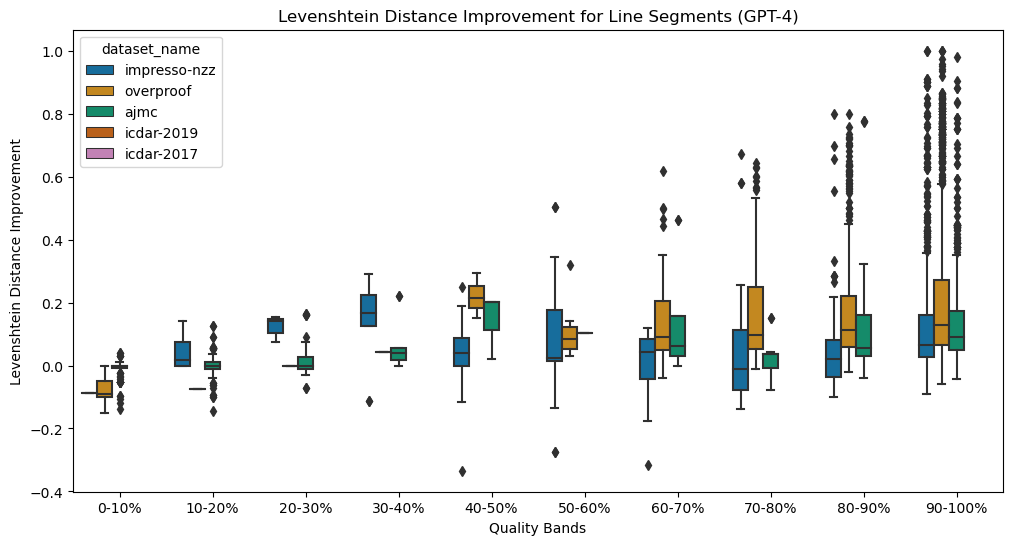

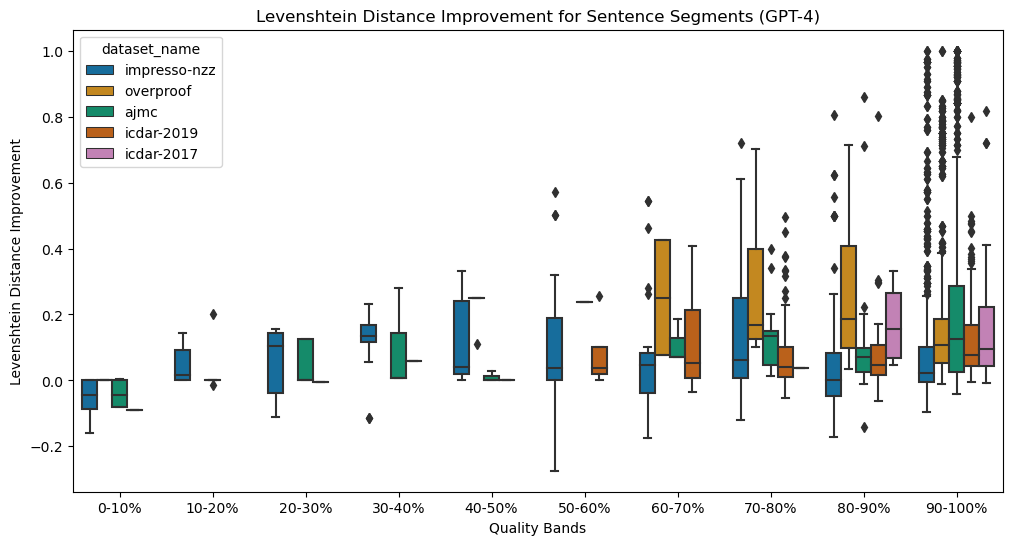

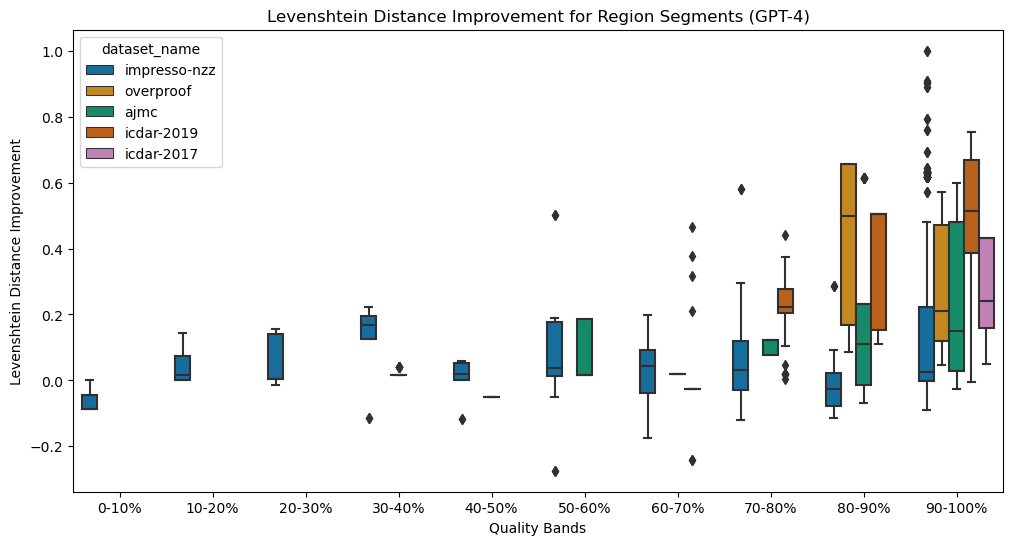

In [185]:

for segment_type in ['line', 'sentence', 'region']:
    # Filter the data by dataset and segment type
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create the box plot
    sns.boxplot(x=f'{segment_type}-ocr-noise-group', y=f'{segment_type}-lev-improvement', 
                data=data, hue='dataset_name', palette='colorblind', ax=ax)

    # Set the plot title and axis labels
    plt.title(f'Levenshtein Distance Improvement for {segment_type.capitalize()} Segments (GPT-4)')
    plt.xlabel('Quality Bands')
    plt.ylabel('Levenshtein Distance Improvement')

    # Show the plot
    plt.show()



  line-ocr-noise-group  dataset_name  line-lev-improvement
0                0-10%  impresso-nzz              0.115398
1               10-20%  impresso-nzz              0.071441
2               20-30%  impresso-nzz             -0.064614
3               30-40%  impresso-nzz              0.030767
4               40-50%  impresso-nzz              0.450127


<Figure size 1200x600 with 0 Axes>

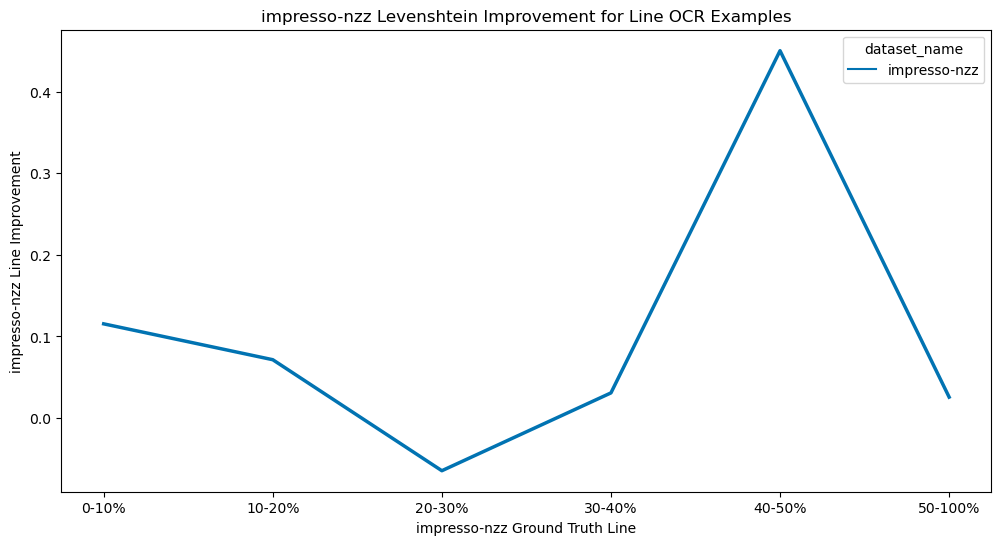

  sentence-ocr-noise-group  dataset_name  sentence-lev-improvement
0                    0-10%  impresso-nzz                  0.086005
1                   10-20%  impresso-nzz                  0.007137
2                   20-30%  impresso-nzz                  0.205864
3                   30-40%  impresso-nzz                 -0.036810
4                   40-50%  impresso-nzz                  0.140497


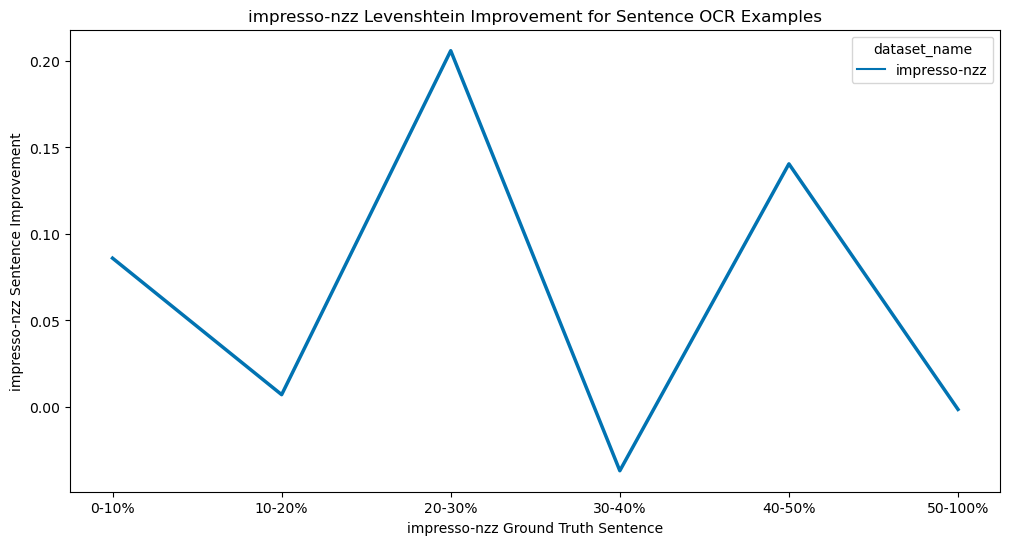

  region-ocr-noise-group  dataset_name  region-lev-improvement
0                  0-10%  impresso-nzz                0.097587
1                 10-20%  impresso-nzz               -0.026708
2                 20-30%  impresso-nzz                0.126754
3                 30-40%  impresso-nzz                0.067138
4                 40-50%  impresso-nzz                0.502463


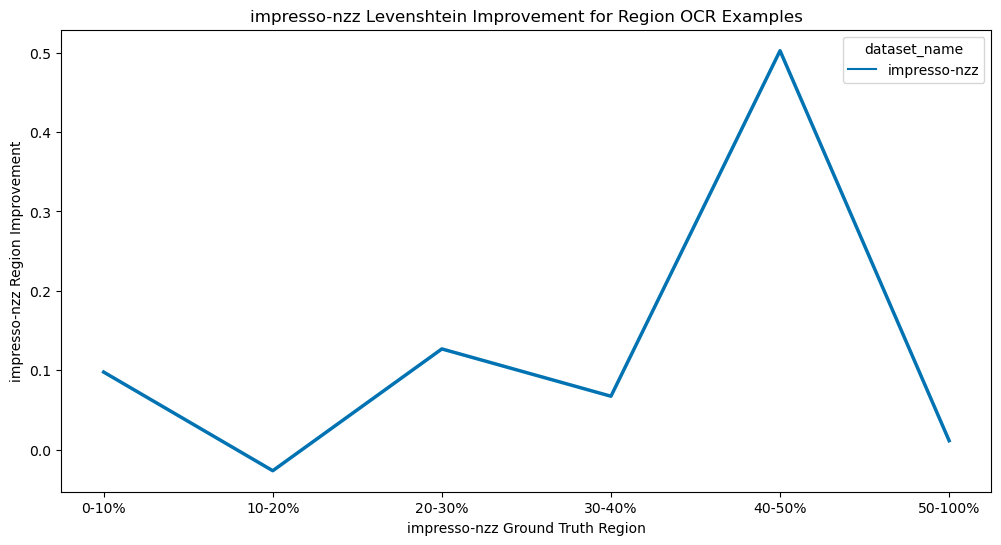

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%    overproof              0.226193
1               10-20%    overproof              0.181323
2               20-30%    overproof              0.153139
3               30-40%    overproof              0.159611
4               40-50%    overproof              0.148937


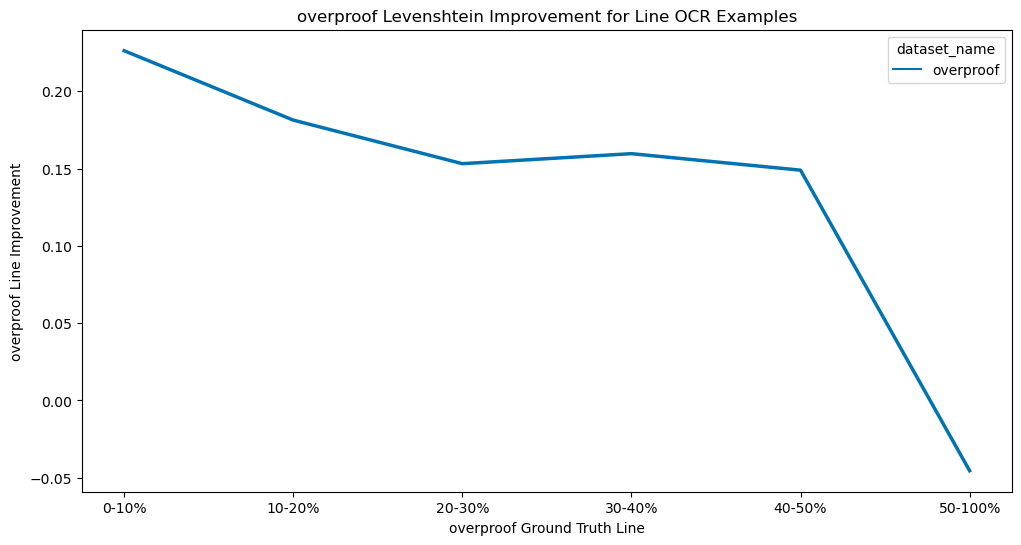

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%    overproof                  0.125408
1                   10-20%    overproof                  0.071686
2                   20-30%    overproof                       NaN
3                   30-40%    overproof                       NaN
4                   40-50%    overproof                       NaN


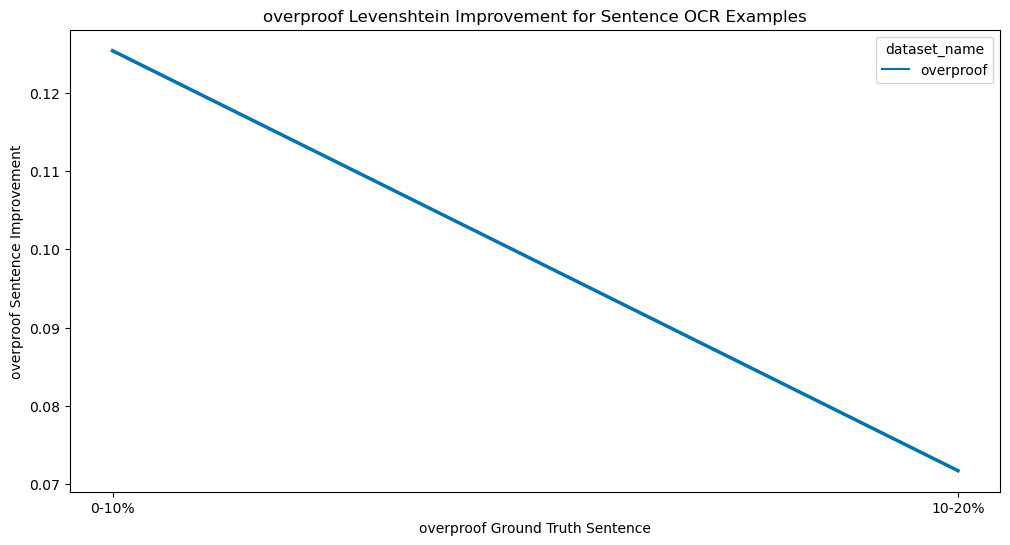

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%    overproof                0.207232
1                 10-20%    overproof                     NaN
2                 20-30%    overproof                     NaN
3                 30-40%    overproof                     NaN
4                 40-50%    overproof                     NaN


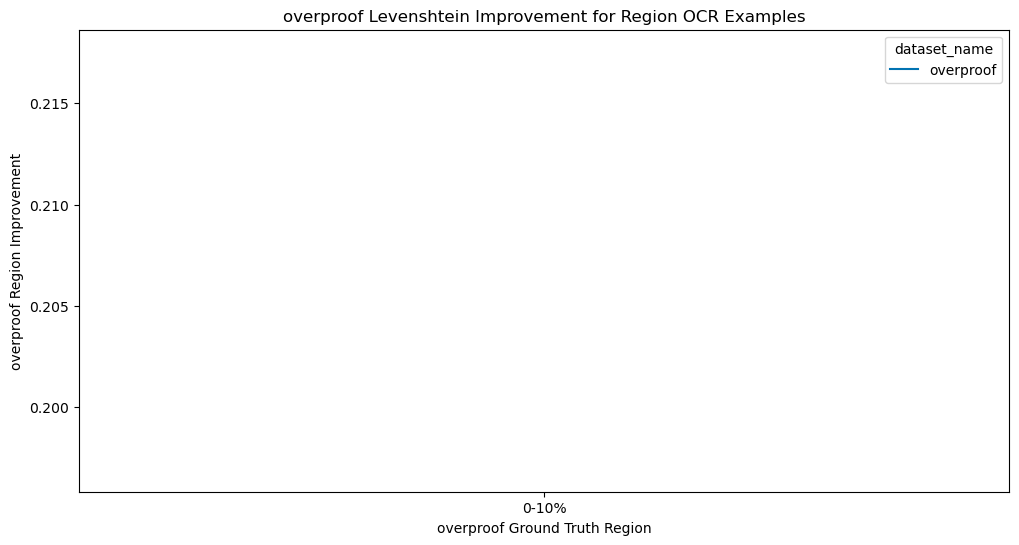

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%         ajmc              0.108890
1               10-20%         ajmc              0.152455
2               20-30%         ajmc             -0.038306
3               30-40%         ajmc              0.461538
4               40-50%         ajmc                   NaN


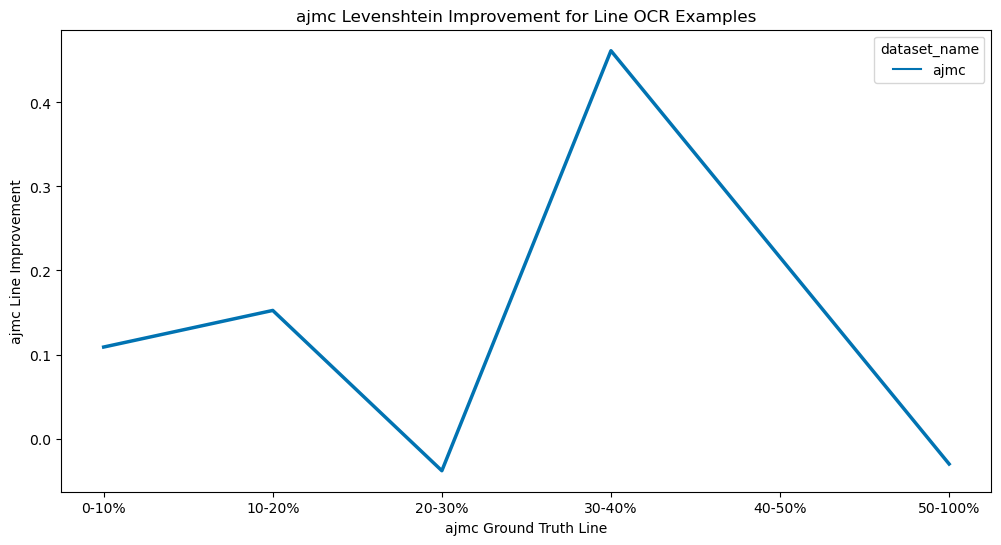

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%         ajmc                  0.267972
1                   10-20%         ajmc                       NaN
2                   20-30%         ajmc                       NaN
3                   30-40%         ajmc                       NaN
4                   40-50%         ajmc                       NaN


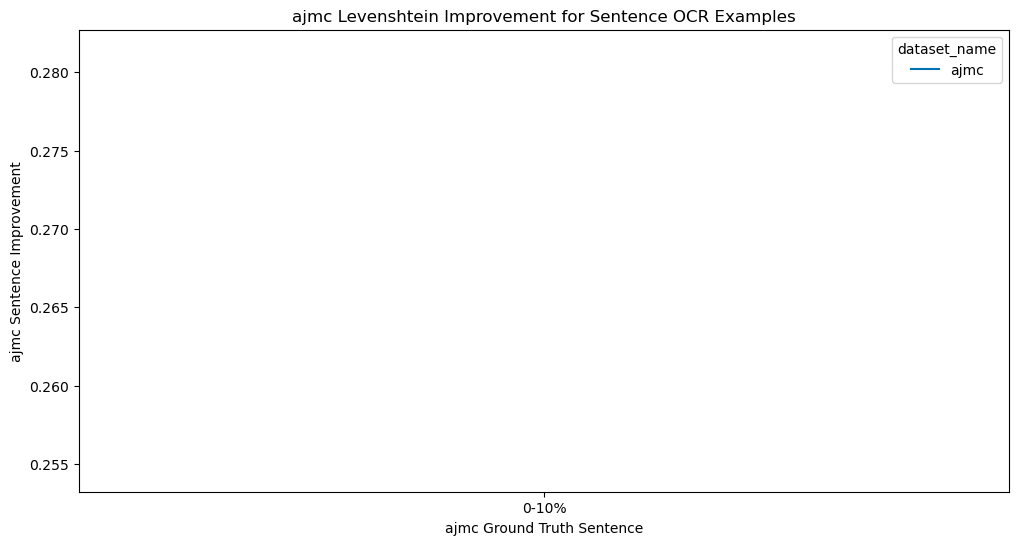

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%         ajmc                0.496562
1                 10-20%         ajmc                     NaN
2                 20-30%         ajmc                     NaN
3                 30-40%         ajmc                     NaN
4                 40-50%         ajmc                     NaN


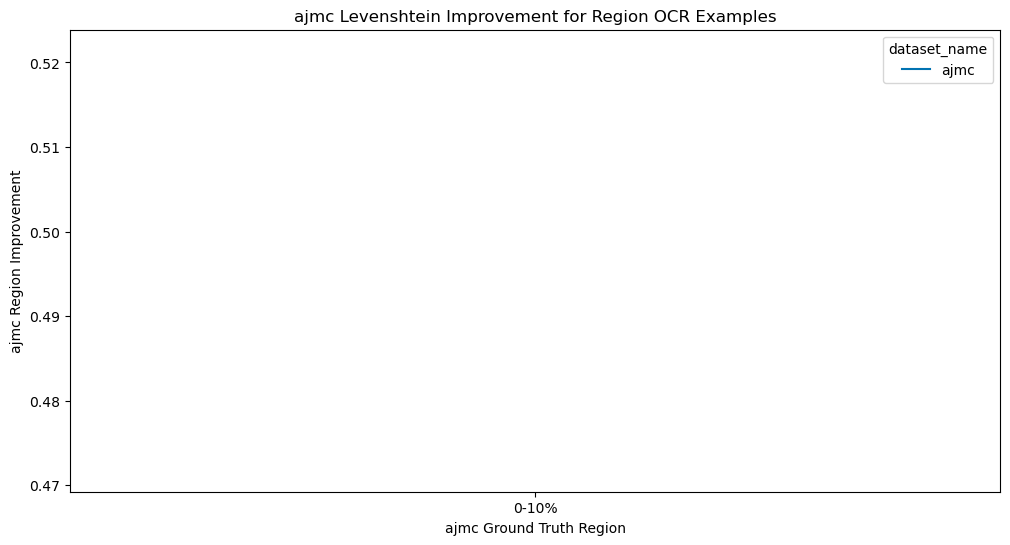

KeyError: 'line-ocr-noise-group'

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the colorblind color palette
sns.set_palette("colorblind")
plt.figure(figsize=(12, 6))

for result in results:
    
    dataset_name = result['dataset_name'].unique()[0]
    
    for segment_type in ['line', 'sentence', 'region']:
        
        #grouped_results = result.groupby([f"{segment_type}-ocr-noise-group", "dataset_name"]).size().reset_index(name="count")
        
        grouped_results = result.groupby([f"{segment_type}-ocr-noise-group", "dataset_name"])[f"{segment_type}-lev-improvement"].mean().reset_index()

        print(grouped_results.head())
        
        
        fig, ax = plt.subplots(figsize=(12, 6))
        
        _ = sns.lineplot(x=f"{segment_type}-ocr-noise-group", y=f'{segment_type}-lev-improvement', hue='dataset_name',
                 data=grouped_results, ax=ax, markers=True, linestyle='-', linewidth=2.5)


        # Set plot labels
        ax.set_xlabel(f"{dataset_name} Ground Truth {segment_type.capitalize()}")
        ax.set_ylabel(f"{dataset_name} {segment_type.capitalize()} Improvement")
        ax.set_title(f"{dataset_name} Levenshtein Improvement for {segment_type.capitalize()} OCR Examples")


        # Show the plot
        plt.show()



In [ ]:
        
        
#         # Create the line plot
#         fig, ax = plt.subplots(figsize=(12, 6))
        
#         sns.lineplot(x=f"groundtruth.{segment_type}", y=f"{segment_type}-improvement", hue='dataset_name',
#                     data=result, ax=ax)

#         # Set plot labels
#         ax.set_xlabel(f"Ground Truth {segment_type.capitalize()}")
#         ax.set_ylabel(f"{segment_type.capitalize()} Improvement")
#         ax.set_title(f"Levenshtein Improvement for {segment_type.capitalize()} OCR Examples")


#         # Show the plot
#         plt.show()

In [ ]:
from genalog.text import anchor

def align_texts(gt_text, ocr_text):

    # We align the texts with RETAS Method
    try:
        aligned_gt, aligned_noise = anchor.align_w_anchor(gt_text, ocr_text)
    except:
        aligned_gt, aligned_noise = gt_text, ocr_text
    
#     print('GT:', gt_text)
#     print('OCR:', ocr_text)
#     print('--'*100)
    return aligned_gt, aligned_noise

In [ ]:
for idx, result in enumerate(results):
    
    results[idx] = results[idx].fillna('No text')
    
    def replace(x):
        if len(x.strip()) == 0:
            return 'No text'
        return x
    
    for column in results[idx].columns:
        results[idx][column] = results[idx][column].apply(lambda x: replace(x))
        
    #results[idx][['groundtruth.line', 'ocr.line']] = results[idx].apply(lambda x: align_texts(x['groundtruth.line'], 
    #                                                                                        x['ocr.line']), axis=1)
    print('--'*40, idx)
    print(results[idx][['groundtruth.line', 'prediction.line']])
    results[idx][['groundtruth.line', 'prediction.line']] = results[idx].apply(lambda x: align_texts(x['groundtruth.line'], 
                                                                                                     x['prediction.line']), axis=1)
    
#     x = results[idx].apply(lambda x: levenshtein(x['groundtruth.line'].split(), 
#                                                             x['ocr.line'].split()), axis=1)
#     x = results[idx].apply(lambda x: levenshtein(x['groundtruth.sentence'].split(), 
#                                                                 x['ocr.sentence'].split()), axis=1)
#     x = results[idx].apply(lambda x: levenshtein(x['groundtruth.region'].split(), 
#                                                               x['ocr.region'].split()), axis=1)
    #print(x)
    

In [ ]:
results[0]

In [ ]:
idx = 9

In [ ]:
df.iloc[idx]['ocr.line']

In [ ]:
df.iloc[idx]['ocr.sentence']

In [ ]:
df.iloc[idx]['ocr.region']

In [ ]:
df.columns

In [ ]:
# ht_raw = " ".join(df['ocr.sentence'].to_list())
# print(f"{len(set(ht_raw.lower()))} characters in human transcription")
# print(f"The following characters have not been system-transcribed: \n{set(ht_raw.lower())-set(st_raw.lower())}")
tokens = ht_raw.split()
WORDS = set(tokens)

In [ ]:
def eddi(input_text, reference_words=WORDS, ed_threshold=25, max_unk_tokens=3):
    """ Baseline I: Edit distance -based Baseline
    An edit distance-based baseline: Given a list of valid (reference) words,
    this baseline (called eddi) detects words not in the reference list and 
    changes them to the closest one in the reference list.
    :param input_text: the source text
    :param reference_words: a list of valid words (e.g., computed from the target data) 
    :param ed_threshold: the edit distance threshold below from which a word is replaced
    :param max_unk_tokens: the max number of unknown tokens in the transcribed text 
    :return: the new text
    """
    tokens = input_text.split()
    # Unknown transcribed tokens; proceed only if few
    unknowns = [i for i, w in enumerate(tokens) if w not in reference_words]
    if len(unknowns) > max_unk_tokens:
        return " ".join(tokens)

    for ind in unknowns:
        # Replace each uknown token with the ground truth token w/min edit distance 
        word = tokens[ind]
        min_cer, new_word = 100, word
        for ref in reference_words:
            candidate_min_cer = pywer.cer([ref], [word])
            if candidate_min_cer < min_cer:
                min_cer = candidate_min_cer
                if min_cer < ed_threshold:
                    new_word = ref
    tokens[ind] = new_word
    
    return " ".join(tokens)